In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google.colab import files
 
#uploaded = files.upload()

In [3]:
#fertiliser_data = pd.read_csv('D:\Exploratory Project\Dataset\FAOSTAT_data_en_4-19-2023 (6).csv')
rainfall_data = pd.read_csv('D:\\Exploratory Project\\Dataset\\1149077d-4531-4846-8c68-26127dc3af5e_Series - Metadata.csv')
temperature_data = pd.read_csv('D:\Exploratory Project\Dataset\FAOSTAT_data_en_4-19-2023 (7).csv')
yield_data = pd.read_csv('D:\Exploratory Project\Dataset\FAOSTAT_data_en_4-19-2023.csv')
area_data = pd.read_csv('D:\Exploratory Project\Dataset\FAOSTAT_data_en_4-19-2023 (1).csv')
production_data = pd.read_csv('D:\Exploratory Project\Dataset\FAOSTAT_data_en_4-19-2023 (2).csv')

In [4]:
#rainfall_data = pd.read_csv("D:\\Exploratory Project\\Dataset\\rainfall.csv")
#temperature_data = pd.read_csv("D:\\Exploratory Project\\Dataset\\temp.csv")
#yield_data = pd.read_csv("D:\Exploratory Project\Dataset\yield.csv")

Data Preparation

Rainfall Data

In [5]:
rainfall_data

,Series Name,Series Code,Country Name,Country Code,Year,Rainfall - (MM)
0,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Afghanistan,AFG,2000,327
1,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Afghanistan,AFG,2001,327
2,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Afghanistan,AFG,2002,327
3,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Afghanistan,AFG,2003,327
4,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Afghanistan,AFG,2004,327
...,...,...,...,...,...,...
184,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Sri Lanka,LKA,2016,1712
185,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Sri Lanka,LKA,2017,1712
186,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Sri Lanka,LKA,2018,1712
187,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,Sri Lanka,LKA,2019,1712


In [6]:
# Number of countries
len(rainfall_data['Country Name'].unique())

9

In [7]:
# Number of years (2000 - 2020)
len(rainfall_data['Year'].unique())

21

In [8]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country Name', 'Country Code'], as_index=False, axis=0).sum()
rainfall_df

C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\3790453899.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df = rainfall_data.groupby(['Year', 'Country Name', 'Country Code'], as_index=False, axis=0).sum()


,Year,Country Name,Country Code,Rainfall - (MM)
0,2000,Afghanistan,AFG,327
1,2000,Bangladesh,BGD,2666
2,2000,Bhutan,BTN,2200
3,2000,China,CHN,645
4,2000,India,IND,1083
...,...,...,...,...
184,2020,India,IND,1083
185,2020,Myanmar,MMR,2091
186,2020,Nepal,NPL,1500
187,2020,Pakistan,PAK,494


Temperature data

In [9]:
temperature_data

,Domain,Area,Element,Months,Year,Unit,Value,Flag,Flag Description
0,Temperature change on land,Afghanistan,Temperature change,January,2000,°C,1.577,E,Estimated value
1,Temperature change on land,Afghanistan,Temperature change,January,2001,°C,-0.592,E,Estimated value
2,Temperature change on land,Afghanistan,Temperature change,January,2002,°C,1.839,E,Estimated value
3,Temperature change on land,Afghanistan,Temperature change,January,2003,°C,2.447,E,Estimated value
4,Temperature change on land,Afghanistan,Temperature change,January,2004,°C,2.657,E,Estimated value
...,...,...,...,...,...,...,...,...,...
3271,Temperature change on land,Sri Lanka,Temperature change,December,2016,°C,1.175,E,Estimated value
3272,Temperature change on land,Sri Lanka,Temperature change,December,2017,°C,1.148,E,Estimated value
3273,Temperature change on land,Sri Lanka,Temperature change,December,2018,°C,1.360,E,Estimated value
3274,Temperature change on land,Sri Lanka,Temperature change,December,2019,°C,1.722,E,Estimated value


In [10]:

# Number of countries
len(temperature_data['Area'].unique())

13

In [11]:
# Number of years (2000 - 2020)
len(temperature_data['Year'].unique())

21

In [12]:
temperature_df =temperature_data.groupby(['Year', 'Area'], as_index=False, axis=0).mean()
temperature_df

C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\272103888.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df =temperature_data.groupby(['Year', 'Area'], as_index=False, axis=0).mean()


,Year,Area,Value
0,2000,Afghanistan,0.975667
1,2000,Bangladesh,0.158500
2,2000,Bhutan,0.204500
3,2000,China,0.556667
4,2000,"China, Hong Kong SAR",0.487000
...,...,...,...
268,2020,India,0.568500
269,2020,Myanmar,1.711833
270,2020,Nepal,0.327417
271,2020,Pakistan,0.390250


Yield Data

In [13]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Flag Description
0,Crops and livestock products,Afghanistan,Yield,"Almonds, in shell",2000,hg/ha,17143,E,Estimated value
1,Crops and livestock products,Afghanistan,Yield,"Almonds, in shell",2001,hg/ha,16667,E,Estimated value
2,Crops and livestock products,Afghanistan,Yield,"Almonds, in shell",2002,hg/ha,21407,E,Estimated value
3,Crops and livestock products,Afghanistan,Yield,"Almonds, in shell",2003,hg/ha,24561,E,Estimated value
4,Crops and livestock products,Afghanistan,Yield,"Almonds, in shell",2004,hg/ha,12250,E,Estimated value
...,...,...,...,...,...,...,...,...,...
14147,Crops and livestock products,Sri Lanka,Yield,Unmanufactured tobacco,2016,hg/ha,38278,A,Official figure
14148,Crops and livestock products,Sri Lanka,Yield,Unmanufactured tobacco,2017,hg/ha,48300,A,Official figure
14149,Crops and livestock products,Sri Lanka,Yield,Unmanufactured tobacco,2018,hg/ha,44118,A,Official figure
14150,Crops and livestock products,Sri Lanka,Yield,Unmanufactured tobacco,2019,hg/ha,82078,A,Official figure


In [14]:
# Number of countries
len(yield_data['Area'].unique())

12

In [15]:
# Number of years (2000 - 2020)
len(yield_data['Year'].unique())

21

In [16]:
len(yield_data['Item'].unique())

128

In [17]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Domain', 'Element','Unit' , 'Flag' , 'Flag Description'], axis=1)
yield_df

,Area,Item,Year,Value
0,Afghanistan,"Almonds, in shell",2000,17143
1,Afghanistan,"Almonds, in shell",2001,16667
2,Afghanistan,"Almonds, in shell",2002,21407
3,Afghanistan,"Almonds, in shell",2003,24561
4,Afghanistan,"Almonds, in shell",2004,12250
...,...,...,...,...
14147,Sri Lanka,Unmanufactured tobacco,2016,38278
14148,Sri Lanka,Unmanufactured tobacco,2017,48300
14149,Sri Lanka,Unmanufactured tobacco,2018,44118
14150,Sri Lanka,Unmanufactured tobacco,2019,82078


Nitrogen (Fertiliser) Data

In [18]:
#fertiliser_data

In [19]:
# Number of countries
#len(fertiliser_data['Area'].unique())

In [20]:
# Number of years (2000 - 2019)
#len(fertiliser_data['Year'].unique())

In [21]:
#fertiliser_df =fertiliser_data.groupby(['Year', 'Area' , 'Element' == 'Agricultural Use in nutrients'], as_index=False, axis=0).mean()
#fertiliser_df

In [22]:
# Remove unnecessary columns
#fertiliser_df = fertiliser_data.drop(['Element'], axis=1)
#fertiliser_df

C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\170133285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df.loc[temperature_df['Area'] == 'India'].groupby('Year').mean().plot()


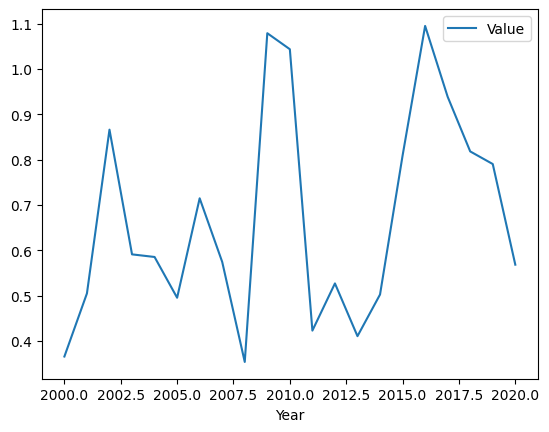

In [23]:
temperature_df.loc[temperature_df['Area'] == 'India'].groupby('Year').mean().plot()
plt.show()

C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\2129237298.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = temperature_df.groupby('Year').mean()


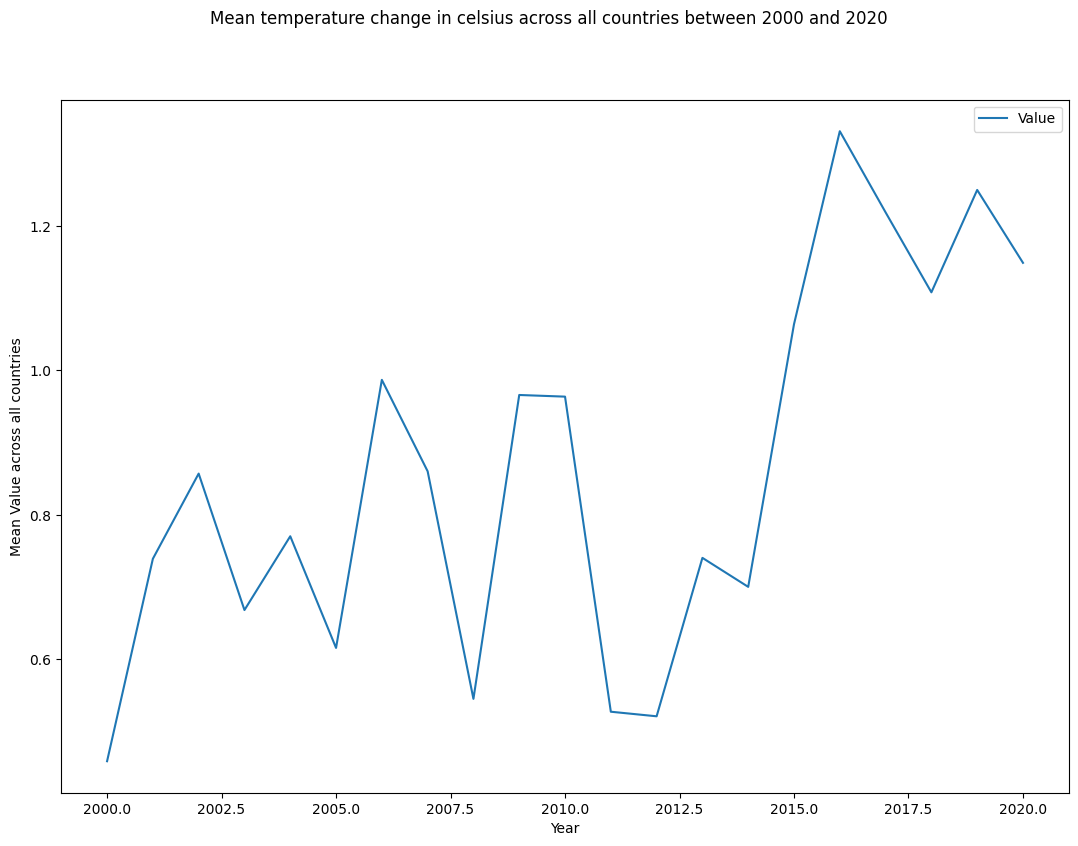

In [24]:
# prepare data
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(13,9))
fig.suptitle('Mean temperature change in celsius across all countries between 2000 and 2020')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

Merging Data

In [25]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)

In [26]:
temperature_df.rename({'Area': 'Country Name','Value': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [27]:
yield_df.rename({'Area': 'Country Name', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
#yield_df.drop('Unit', axis=1, inplace=True)
     

In [28]:
#fertiliser_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)
#fertiliser_df.drop(['Unit', 'Item'], axis=1, inplace=True)

In [29]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country Name', 'Year'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country Name', 'Year'])
#rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, fertiliser_df, on=['Country', 'Year'])
#rain_temp_yield_pest_df.drop('Country Code', axis=1, inplace=True)
#data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]
data = rain_temp_yield_df[['Year', 'Country Name', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Yield (hg/ha)']]
data

,Year,Country Name,Item,Rainfall (mm),Temperature (Celsius),Yield (hg/ha)
0,2000,Afghanistan,"Almonds, in shell",327,0.975667,17143
1,2000,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",327,0.975667,6250
2,2000,Afghanistan,Apples,327,0.975667,72415
3,2000,Afghanistan,Apricots,327,0.975667,74451
4,2000,Afghanistan,Barley,327,0.975667,5968
...,...,...,...,...,...,...
9998,2020,Sri Lanka,Sugar cane,1712,1.246167,592650
9999,2020,Sri Lanka,Sweet potatoes,1712,1.246167,109664
10000,2020,Sri Lanka,Tea leaves,1712,1.246167,45752
10001,2020,Sri Lanka,Tomatoes,1712,1.246167,137779


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10003 entries, 0 to 10002
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   10003 non-null  int64  
 1   Country Name           10003 non-null  object 
 2   Item                   10003 non-null  object 
 3   Rainfall (mm)          10003 non-null  int64  
 4   Temperature (Celsius)  10003 non-null  float64
 5   Yield (hg/ha)          10003 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 547.0+ KB


In [31]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Yield (hg/ha)
count,10003.000000,10003.000000,10003.000000,10003.000000
mean,2010.175747,1328.190743,0.879090,76122.580026
std,6.030856,815.840576,0.400025,100721.467555
min,2000.000000,327.000000,0.066500,11.000000
25%,2005.000000,645.000000,0.542917,12394.000000
50%,2010.000000,1500.000000,0.897417,40795.000000
75%,2015.000000,2091.000000,1.197417,99961.000000
max,2020.000000,2666.000000,1.839417,797810.000000


In [32]:
# Number of countries
#len(data.Country Name.unique())

In [33]:
# Number of years (2000 - 2020)
len(data.Year.unique())

21

Data Exploration

C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\577026599.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


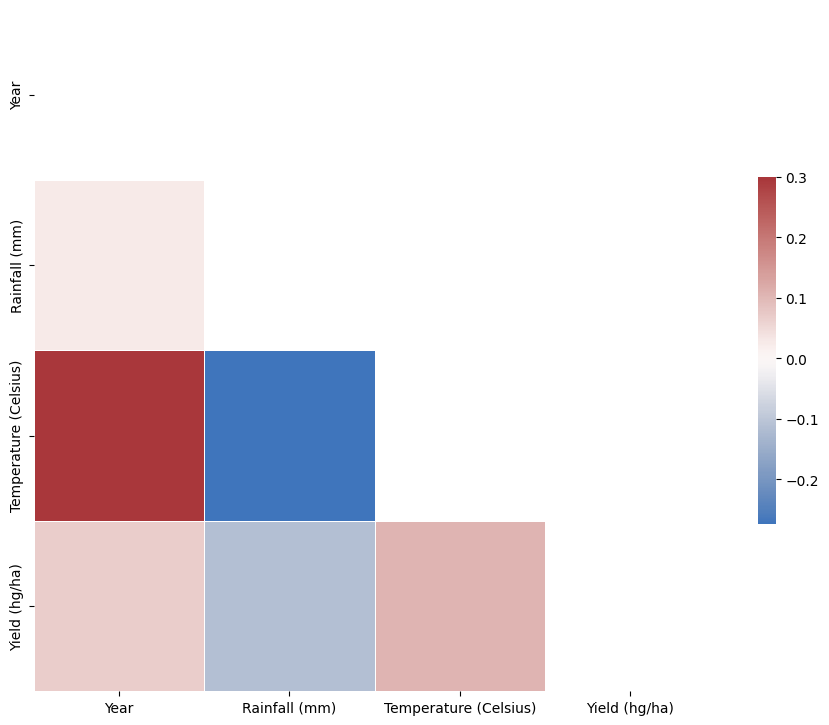

In [34]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\4014522821.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = data.groupby(['Year', 'Item']).mean()


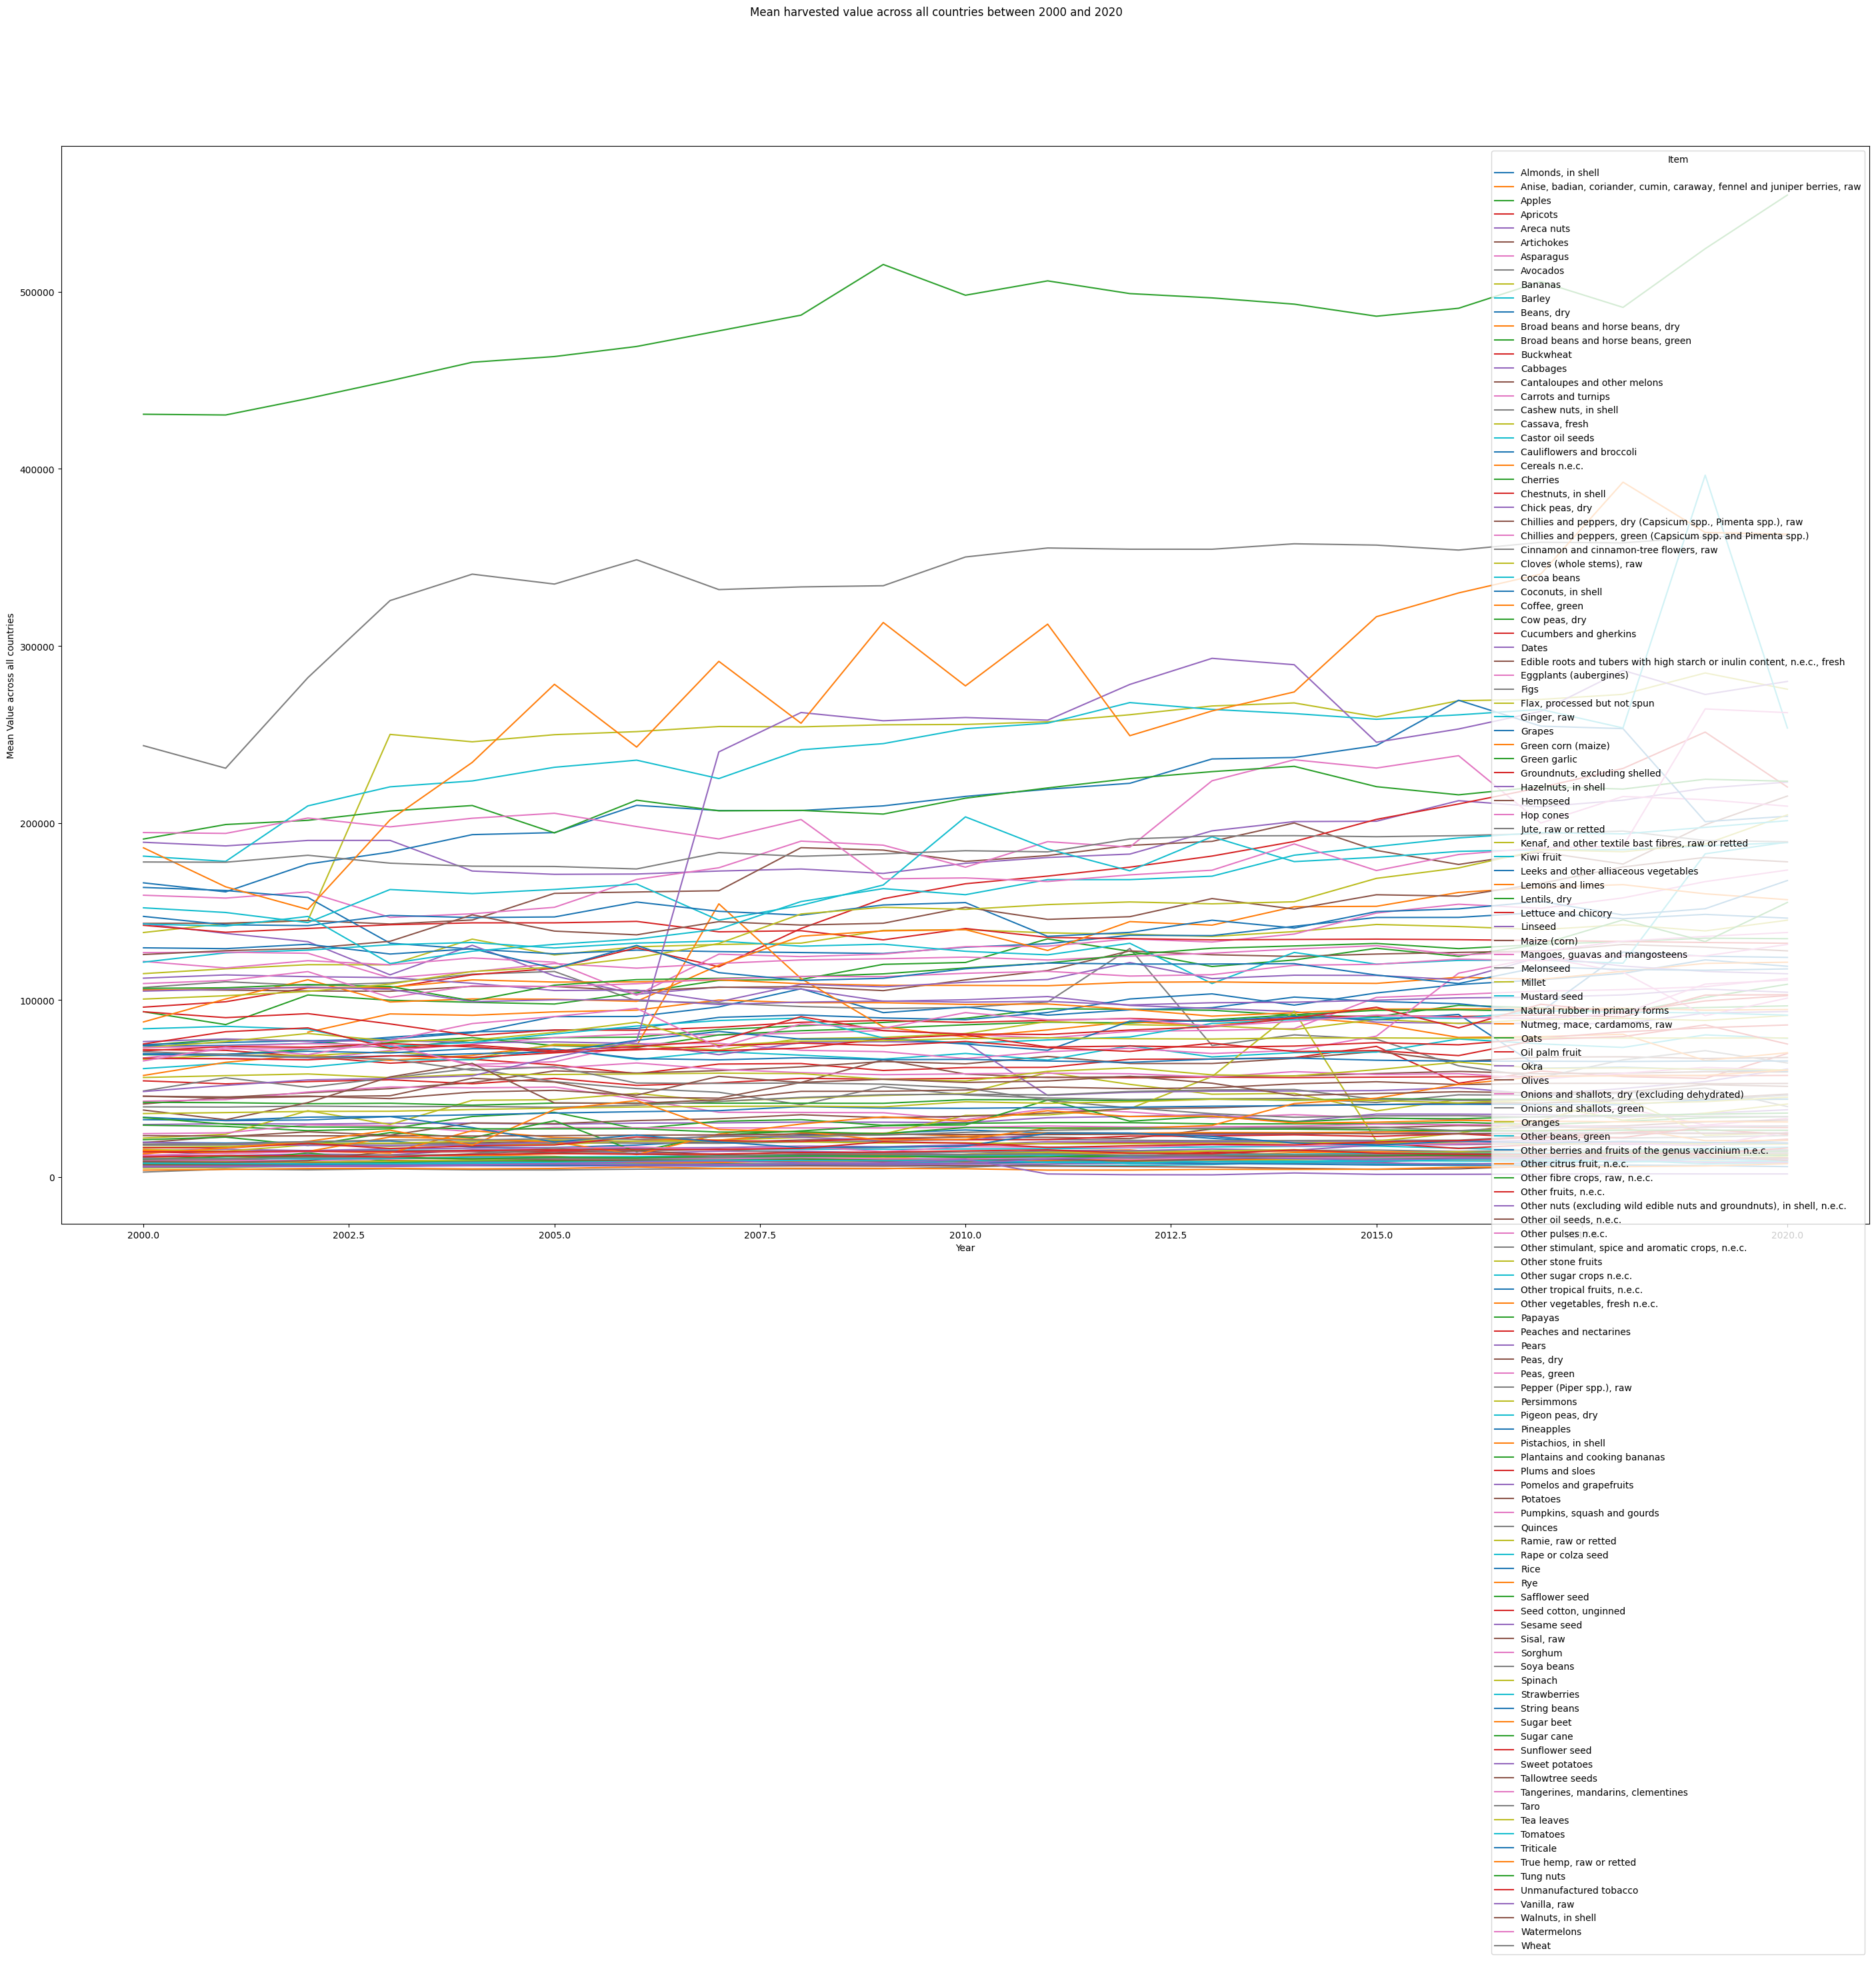

In [35]:
# prepare data
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(35,21))
fig.suptitle('Mean harvested value across all countries between 2000 and 2020')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

Data Preprocessing

In [36]:
#One Hot Encoding

In [37]:
data.shape

(10003, 6)

In [38]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['Country Name', 'Item'], prefix=['Country Name', 'Item'])
data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [39]:
data.shape

(10003, 140)

In [60]:
data

,Year,Rainfall (mm),Temperature (Celsius),Country Name_Afghanistan,Country Name_Bangladesh,Country Name_Bhutan,Country Name_China,Country Name_Myanmar,Country Name_Nepal,Country Name_Pakistan,...,Item_Tomatoes,Item_Triticale,"Item_True hemp, raw or retted",Item_Tung nuts,Item_Unmanufactured tobacco,"Item_Vanilla, raw","Item_Walnuts, in shell",Item_Watermelons,Item_Wheat,Yield (hg/ha)
0,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17143
2,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72415
3,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74451
4,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5968
5,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,1.0,0.592133,0.665382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592650
9999,1.0,0.592133,0.665382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109664
10000,1.0,0.592133,0.665382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45752
10001,1.0,0.592133,0.665382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137779


In [40]:
#Removing of Outliers

In [41]:
from scipy import stats

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield (hg/ha)', y)
data = X

In [42]:
data.shape

(7464, 140)

In [43]:
#Feature Scalings

In [61]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [45]:
data.shape

(7464, 140)

In [62]:
data


,Year,Rainfall (mm),Temperature (Celsius),Country Name_Afghanistan,Country Name_Bangladesh,Country Name_Bhutan,Country Name_China,Country Name_Myanmar,Country Name_Nepal,Country Name_Pakistan,...,Item_Tomatoes,Item_Triticale,"Item_True hemp, raw or retted",Item_Tung nuts,Item_Unmanufactured tobacco,"Item_Vanilla, raw","Item_Walnuts, in shell",Item_Watermelons,Item_Wheat,Yield (hg/ha)
0,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17143
2,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72415
3,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74451
4,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5968
5,0.0,0.000000,0.512808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,1.0,0.592133,0.665382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592650
9999,1.0,0.592133,0.665382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109664
10000,1.0,0.592133,0.665382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45752
10001,1.0,0.592133,0.665382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137779


Modelling

In [46]:
y = data['Yield (hg/ha)']
X = data.drop(['Yield (hg/ha)', 'Year'], axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
from scipy.stats import linregress

def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

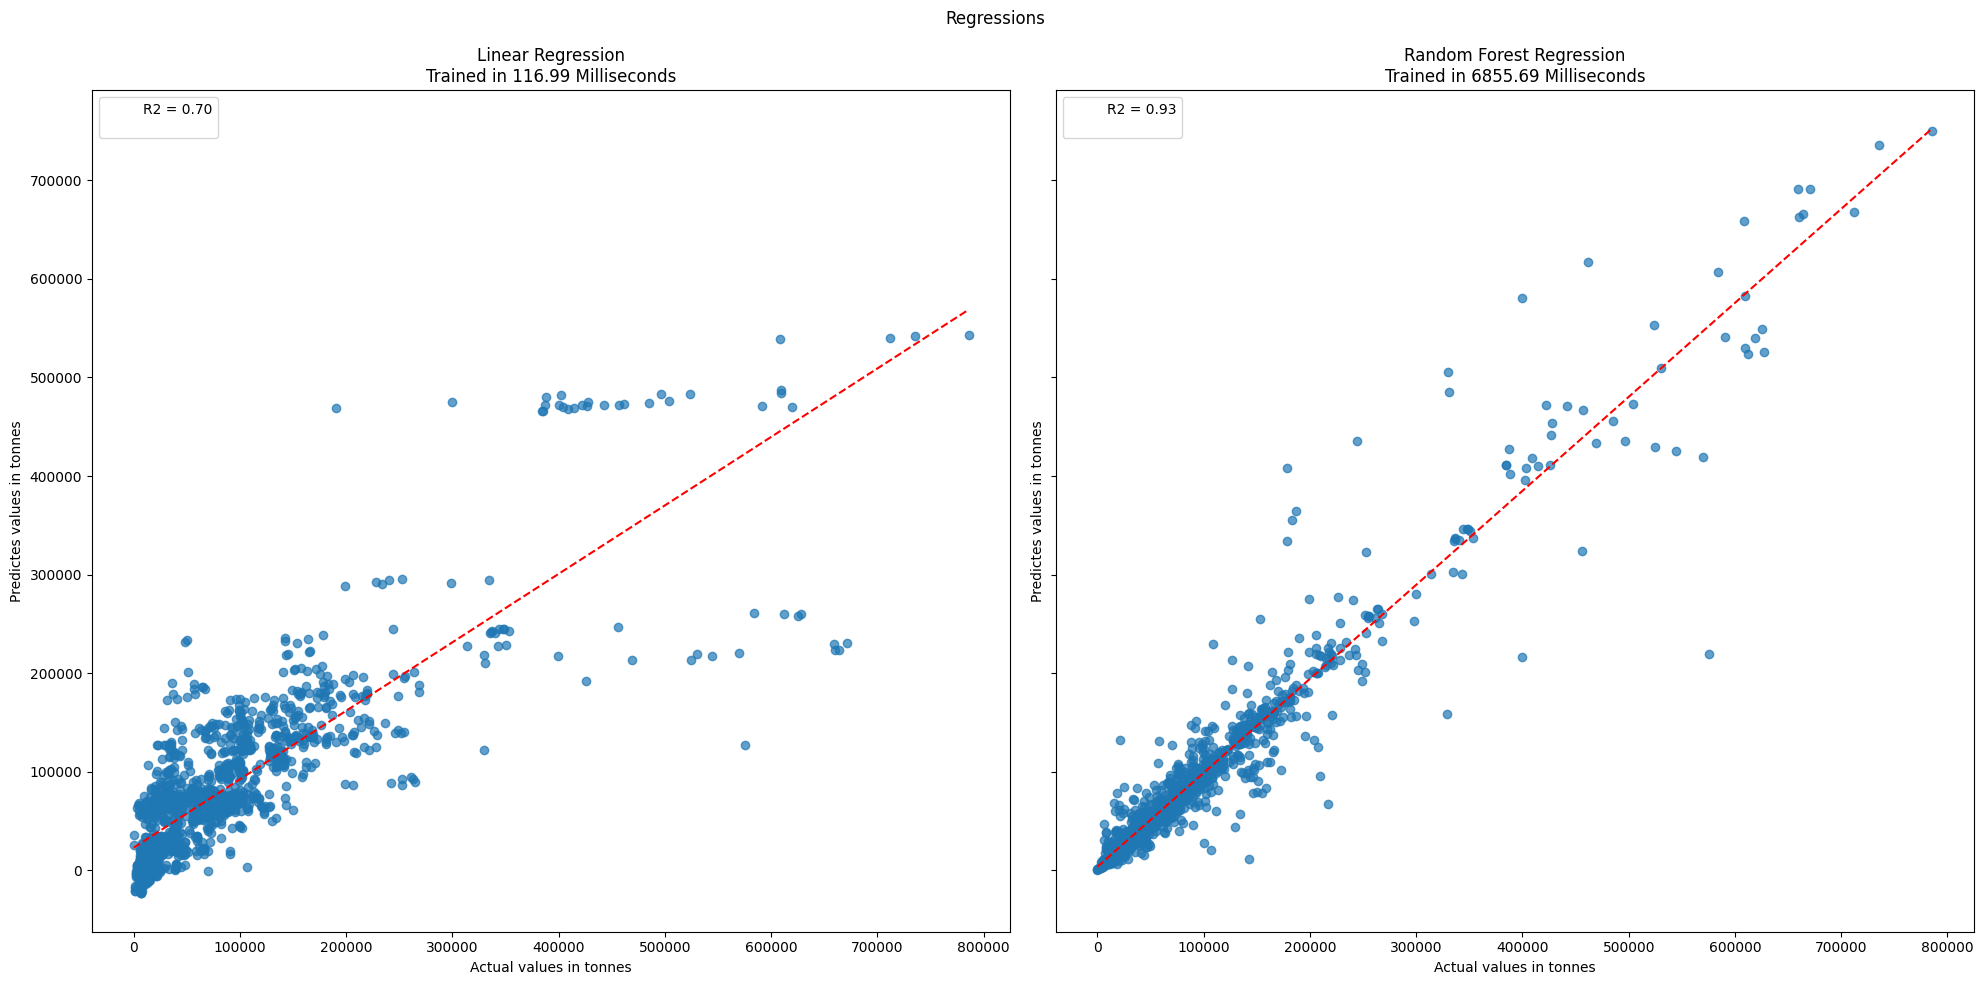

In [50]:

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import time
from scipy.stats import linregress

lin = LinearRegression()
rfr = RandomForestRegressor()

# Keeping the regression models as variables
estimators = [('Linear Regression', lin),
              ('Random Forest Regression', rfr)]

# Festlegen des Subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20, 10))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Training the model
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # Anzeigen des Modelles
  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                        (  r'R2 = {:.2f}' + '\n')
                          .format(r2_score(y_test, y_pred)))
  
plt.suptitle('Regressions')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [51]:
# Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [52]:
lr_predict = model.predict(X_test)
lr_predict

array([ -2752.,  -6144., 144192., ...,  61312.,  -1664.,  83904.])

In [53]:
model.score(X_test,y_test)

0.6996640468824213

In [54]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.6996640468824213


C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\3691721178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\3691721178.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

Text(0.5, 1.0, 'Linear Regression')

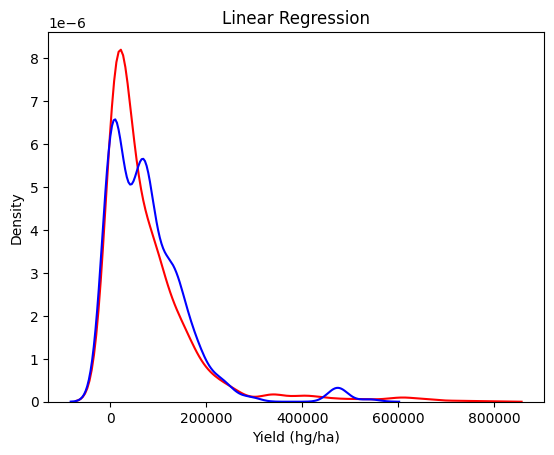

In [55]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(lr_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Linear Regression')

In [56]:
# Training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(X_train,y_train)
rf_predict = model.predict(X_test)
rf_predict

array([  2124.        ,   7093.18181818, 119735.45454545, ...,
        15763.27272727,   4662.63636364,  18653.27272727])

In [57]:
model.score(X_test,y_test)

0.9319553979127966

In [58]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9319553979127966


C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\bhawi\AppData\Local\Temp\ipykernel_23888\551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

Text(0.5, 1.0, 'Random Forest Regression')

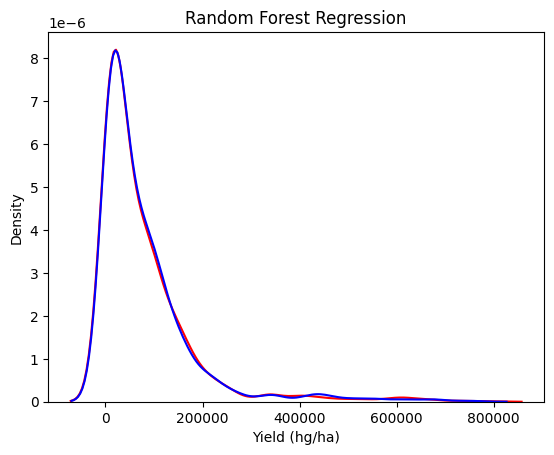

In [59]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')